In [21]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys, traceback

In [22]:
gtb_data = pd.read_csv('xGTBank.csv')
gtb_data

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Resigned
0,3.8,5.3,3,167,3,0,0,sales,low,1
1,8.0,8.6,6,272,6,0,0,sales,medium,1
2,1.1,8.8,8,282,4,0,0,sales,medium,1
3,3.7,5.2,3,169,3,0,0,sales,low,1
4,4.1,5.0,3,163,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
25486,4.0,5.7,2,151,3,0,0,support,low,1
25487,3.7,4.8,2,160,3,0,0,support,low,1
25488,3.7,5.3,2,143,3,0,0,support,low,1
25489,1.1,9.6,6,280,4,0,0,support,low,1


In [23]:
gtb = gtb_data

In [24]:
col_names = gtb.columns.tolist()
print('Column names:')
print(col_names)

print('\nSample data:')
gtb.head

Column names:
['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Department', 'salary', 'Resigned']

Sample data:


<bound method NDFrame.head of        satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                     3.8                     5.3                   3   
1                     8.0                     8.6                   6   
2                     1.1                     8.8                   8   
3                     3.7                     5.2                   3   
4                     4.1                     5.0                   3   
...                   ...                     ...                 ...   
25486                 4.0                     5.7                   2   
25487                 3.7                     4.8                   2   
25488                 3.7                     5.3                   2   
25489                 1.1                     9.6                   6   
25490                 3.7                     5.2                   2   

       average_montly_hours  time_spend_company  Work_accident  \
0                       167

In [25]:
#Change Department to lower case
gtb = gtb.rename(columns = {'Department':'department'})

In [26]:
#display data type for each column
gtb.dtypes

satisfaction_level        float64
last_evaluation_rating    float64
projects_worked_on          int64
average_montly_hours        int64
time_spend_company          int64
Work_accident               int64
promotion_last_5years       int64
department                 object
salary                     object
Resigned                    int64
dtype: object

In [ ]:
#department and salary are both categorical data and so need to be changed to numerical data


In [27]:
#let's check for missing values
gtb.isnull().any()

satisfaction_level        False
last_evaluation_rating    False
projects_worked_on        False
average_montly_hours      False
time_spend_company        False
Work_accident             False
promotion_last_5years     False
department                False
salary                    False
Resigned                  False
dtype: bool

In [28]:
#another method for checking for missing values
gtb.isna().sum()

satisfaction_level        0
last_evaluation_rating    0
projects_worked_on        0
average_montly_hours      0
time_spend_company        0
Work_accident             0
promotion_last_5years     0
department                0
salary                    0
Resigned                  0
dtype: int64

In [29]:
#check for dimensions
gtb.shape

(25491, 10)

In [30]:
#let's check the summary of the data
gtb.describe()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Resigned
count,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000
mean,6.137704,7.167832,4.215174,205.286846,3.497156,0.146012,0.021419,0.234985
std,2.486316,1.710754,1.324228,50.182916,1.457715,0.353125,0.144780,0.423998
min,0.900000,3.600000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,4.400000,5.600000,3.000000,160.000000,3.000000,0.000000,0.000000,0.000000
50%,6.500000,7.200000,4.000000,204.000000,3.000000,0.000000,0.000000,0.000000
75%,8.200000,8.700000,5.000000,249.000000,4.000000,0.000000,0.000000,0.000000
max,10.000000,10.000000,8.000000,320.000000,10.000000,1.000000,1.000000,1.000000


In [31]:
#let's see the different departments
#that means we need to get the unique values for department
gtb['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [ ]:
#To reduce redundancy/duplication,Let's combine the core IT departments as technical(technical, support and IT) 
(This will improve your data integrity, save storage space and enhance the efficiency of IT operations.)

In [32]:
gtb['department'] = gtb['department'].replace('support','technical')
gtb['department'] = gtb['department'].replace('IT','technical')

In [33]:
print(gtb['department'].unique())

['sales' 'accounting' 'hr' 'technical' 'management' 'product_mng'
 'marketing' 'RandD']


### DATA EXPLORATION

In [ ]:
#Let's check the number of those who resigned and why, and those who did not.

In [34]:
gtb['Resigned'].value_counts()

Resigned
0    19501
1     5990
Name: count, dtype: int64

In [35]:
gtb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25491 entries, 0 to 25490
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      25491 non-null  float64
 1   last_evaluation_rating  25491 non-null  float64
 2   projects_worked_on      25491 non-null  int64  
 3   average_montly_hours    25491 non-null  int64  
 4   time_spend_company      25491 non-null  int64  
 5   Work_accident           25491 non-null  int64  
 6   promotion_last_5years   25491 non-null  int64  
 7   department              25491 non-null  object 
 8   salary                  25491 non-null  object 
 9   Resigned                25491 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.9+ MB


### DATA VISUALISATION

In [36]:
%matplotlib inline

<Axes: xlabel='department'>

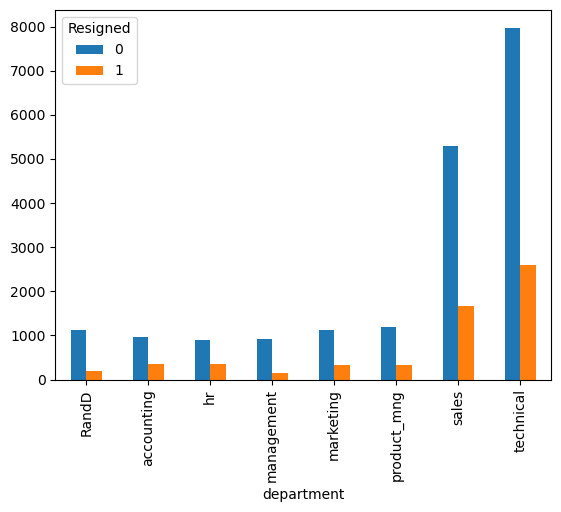

In [37]:
#barchart for department workers and the frequency of turnover
pd.crosstab(gtb['department'], gtb['Resigned']).plot(kind = 'bar')

In [51]:
pd.crosstab(gtb['department'], gtb['Resigned']).plot(kind = 'piechart')

ValueError: piechart is not a valid plot kind

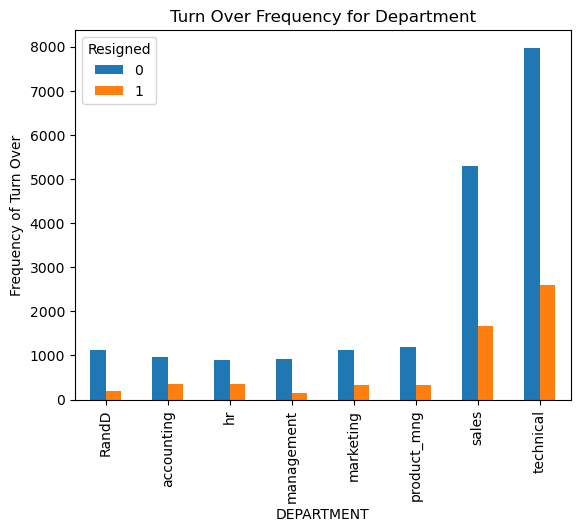

In [38]:
pd.crosstab(gtb['department'], gtb['Resigned']).plot(kind = 'bar')
plt.title('Turn Over Frequency for Department')
plt.xlabel('DEPARTMENT')
plt.ylabel('Frequency of Turn Over')
plt.savefig('Department_Bar_Chart')

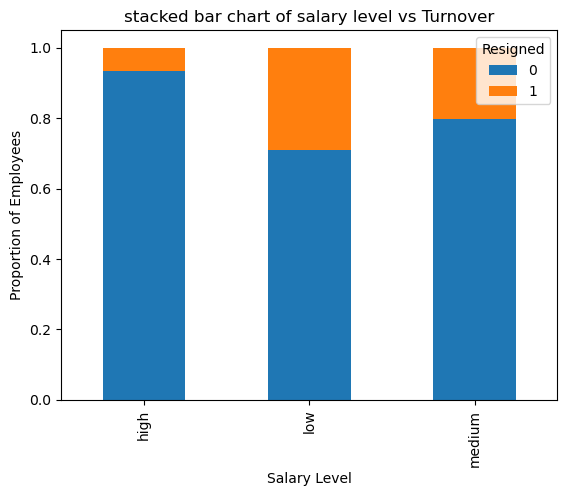

In [41]:
#bar chart for worker's salary level and the frequency of turnover
table = pd.crosstab(gtb.salary, gtb.Resigned)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar',stacked = True)
plt.title('stacked bar chart of salary level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

In [ ]:
#Note/observe that over 90% of staff with high pay stayed and approximately 30% of staff with low salary level left

In [39]:
#let's get the proportion of staff that left by department
pd.crosstab(gtb.department, gtb.Resigned)

Resigned,0,1
department,,
RandD,1130,205
accounting,966,350
hr,903,358
management,923,144
marketing,1121,334
product_mng,1183,331
sales,5298,1675
technical,7977,2593


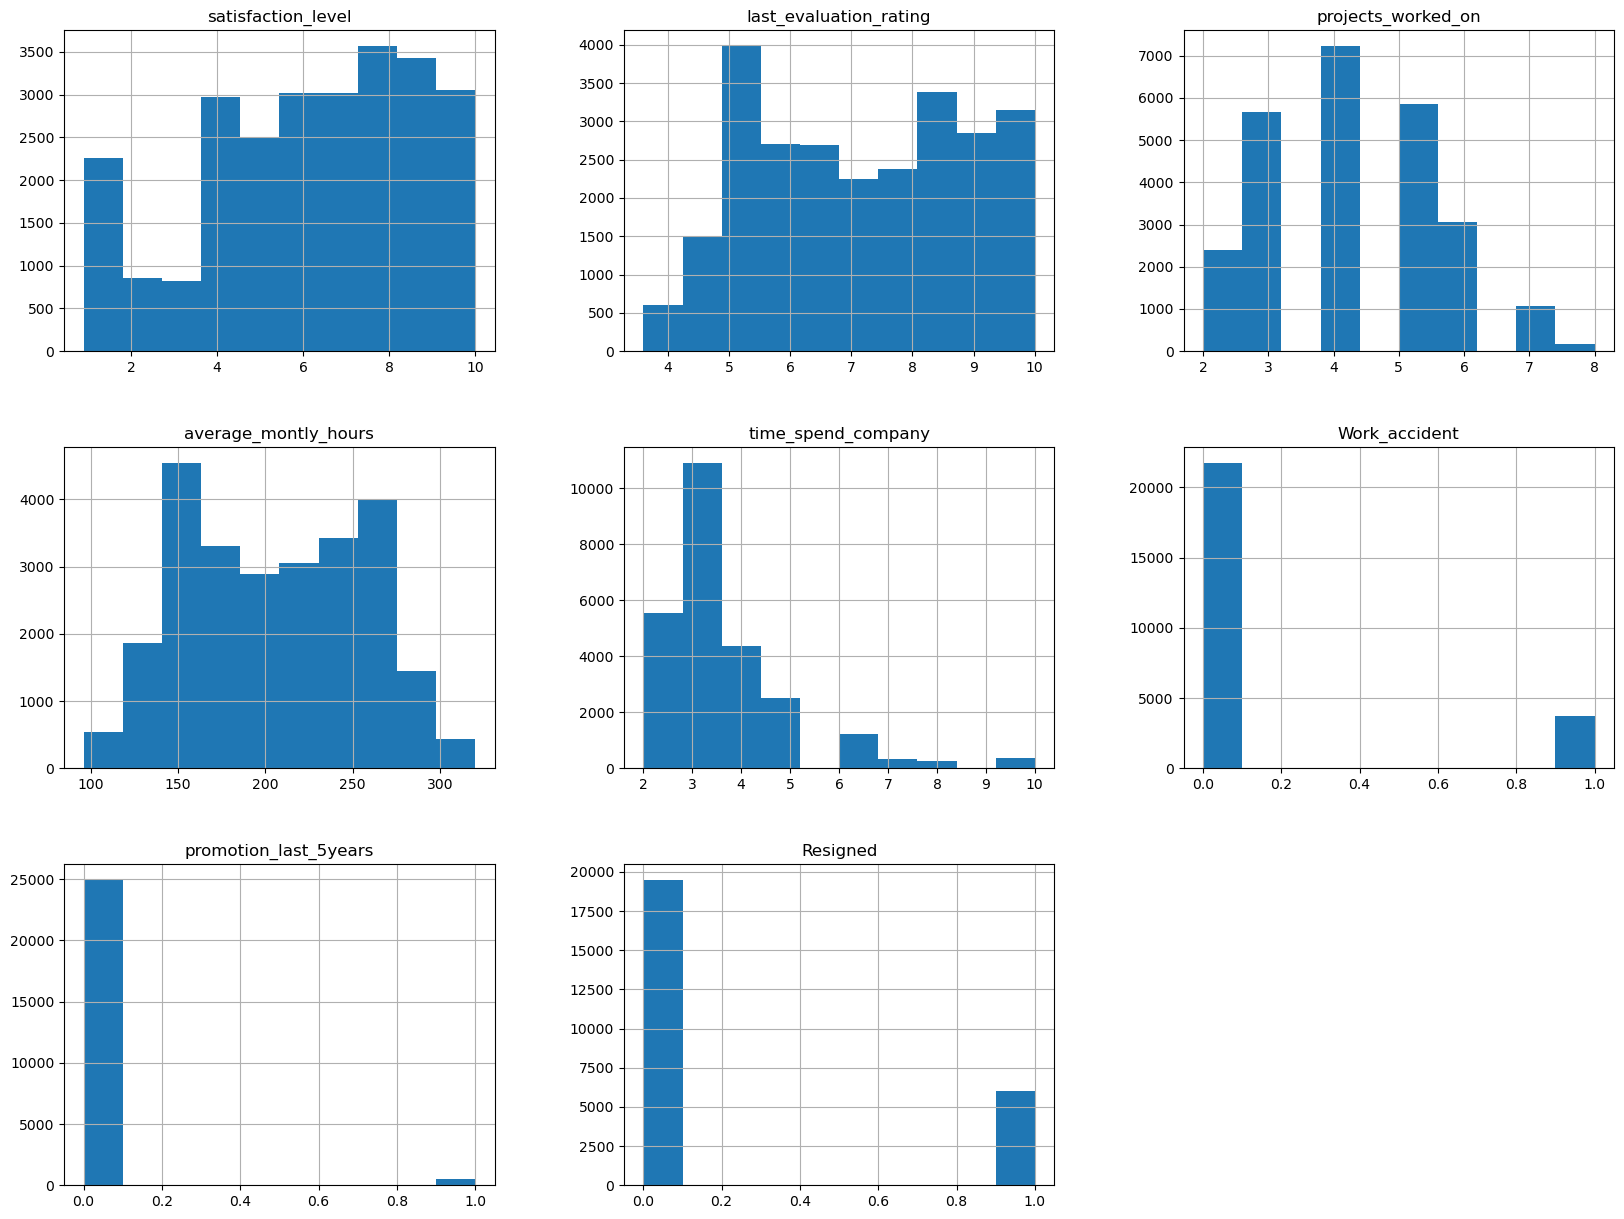

In [40]:
#let's create a histogram of numeric variables 
#(note a histogram often displays numeric data by grouping data into bins of equal width)
num_bins = 10

gtb.hist(bins = num_bins, figsize = (20,15))
plt.savefig('gtb_histogram_plots')
plt.show()

In [41]:
gtb.head()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,Resigned
0,3.8,5.3,3,167,3,0,0,sales,low,1
1,8.0,8.6,6,272,6,0,0,sales,medium,1
2,1.1,8.8,8,282,4,0,0,sales,medium,1
3,3.7,5.2,3,169,3,0,0,sales,low,1
4,4.1,5.0,3,163,3,0,0,sales,low,1


In [ ]:
#note we have 2 categorical columns(not numeric), which are department and salary(we need to convert both to numeric values)
#why? becuause machine learning models require all input and output to be numeric.
#there are 2 methods to convert to numeric i.e 
#1.Replacement() 
#2. Get _ dummies(). to do this, Create the dummies column(s), 2nd you have to concactenate and third drop colums.
# we are using method #2

In [8]:
x = 'Lape'
y = 'Odejayi'
full_name = x + y
print(x + y)
print(x + ' ' + y)

LapeOdejayi
Lape Odejayi


In [42]:
cat_vars = ['department', 'salary']
for var in cat_vars:
    cat_list = 'var'+'_'+var
    cat_list = pd.get_dummies(gtb[var], prefix = var)
    gtb1 = gtb.join(cat_list)
    gtb = gtb1

In [43]:
gtb.head()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,Resigned,...,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_technical,salary_high,salary_low,salary_medium
0,3.8,5.3,3,167,3,0,0,sales,low,1,...,False,False,False,False,False,True,False,False,True,False
1,8.0,8.6,6,272,6,0,0,sales,medium,1,...,False,False,False,False,False,True,False,False,False,True
2,1.1,8.8,8,282,4,0,0,sales,medium,1,...,False,False,False,False,False,True,False,False,False,True
3,3.7,5.2,3,169,3,0,0,sales,low,1,...,False,False,False,False,False,True,False,False,True,False
4,4.1,5.0,3,163,3,0,0,sales,low,1,...,False,False,False,False,False,True,False,False,True,False


In [44]:
gtb.drop(gtb.columns[[7,8]], axis = 1, inplace = True)

In [45]:
gtb.columns.values

array(['satisfaction_level', 'last_evaluation_rating',
       'projects_worked_on', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'Resigned',
       'department_RandD', 'department_accounting', 'department_hr',
       'department_management', 'department_marketing',
       'department_product_mng', 'department_sales',
       'department_technical', 'salary_high', 'salary_low',
       'salary_medium'], dtype=object)

In [46]:
gtb.head()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Resigned,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_technical,salary_high,salary_low,salary_medium
0,3.8,5.3,3,167,3,0,0,1,False,False,False,False,False,False,True,False,False,True,False
1,8.0,8.6,6,272,6,0,0,1,False,False,False,False,False,False,True,False,False,False,True
2,1.1,8.8,8,282,4,0,0,1,False,False,False,False,False,False,True,False,False,False,True
3,3.7,5.2,3,169,3,0,0,1,False,False,False,False,False,False,True,False,False,True,False
4,4.1,5.0,3,163,3,0,0,1,False,False,False,False,False,False,True,False,False,True,False


## SPLITTING OUR DATASET

In [47]:
##Now let's split our dataset into x & y (y is = resigned, every other thing is x)
gtb_vars = gtb.columns.values.tolist()
y = ['Resigned']
x = [i for i in gtb_vars if i not in y]

In [48]:
x

['satisfaction_level',
 'last_evaluation_rating',
 'projects_worked_on',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'department_RandD',
 'department_accounting',
 'department_hr',
 'department_management',
 'department_marketing',
 'department_product_mng',
 'department_sales',
 'department_technical',
 'salary_high',
 'salary_low',
 'salary_medium']

## FEATURE SELECTION

In [ ]:
#we are importing Recursive Feature Elimination using sklearn (check notes).

In [50]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

rfe = RFE(estimator = LogisticRegression(),n_features_to_select = 10)
rfe = rfe.fit(gtb[x], gtb[y])
print(rfe.support_)
print(rfe.ranking_)

C:\Users\lodej\OneDrive\Desktop\sample_projects_data\env\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lodej\OneDrive\Desktop\sample_projects_data\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lodej\OneDrive\Desktop\sample_projects_data\env\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was pa

[ True False False False  True  True  True  True False  True  True False
 False False False  True  True  True]
[1 3 2 9 1 1 1 1 4 1 1 6 8 7 5 1 1 1]


In [51]:
cols = ['satisfaction_level', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'department_RandD', 'department_hr', 'department_management', 'salary_high',  'salary_low',  'salary_medium']

x = gtb[cols]
y = gtb['Resigned']

In [ ]:
#Now we are going to use different classification models for building;
#and we will compare to see the accuracies for the different models we use.
#We will use: 1. LogisticRegression, 2. Random Forest Classifier, 3. SVM (support vector machines), and XGBoost Classifier.

## LOGISTIC REGRESSION MODEL

In [52]:
#But first let's import our train_test_split so we can train and test our model.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [53]:
##Logistic regression classifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [54]:
##To test how well the model has performed durring training we do as follows
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {: .3f}'.format(accuracy_score(y_test, logreg.predict(x_test))))

Logistic regression accuracy:  0.766


In [ ]:
##The logistic regression accuracy score is 76.6%, this is not too accurate. We will need to test another model.

### RANDOM FOREST

In [55]:
##Random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [56]:
##Now let's see the accuracy we achieved
print('Random Forest accuracy: {: .3f}'.format(accuracy_score(y_test, rf.predict(x_test))))

Random Forest accuracy:  0.965


In [ ]:
##The Random Forest accuracy score is 96.4%

### Support Vector Machine (SVM)

In [57]:
##SVM Classifier
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [38]:
##Now let's see the accuracy we achieved
print('Support vector machine accuracy: {: .3f}'.format(accuracy_score(y_test, svc.predict(x_test))))

Support vector machine accuracy:  0.891


In [ ]:
##The Random Forest accuracy score is 89.1%

### XGBoost Classifier

In [39]:
!pip install xgboost

In [58]:
##XGBoost classifier
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [41]:
##Now let's see the accuracy we achieved
print('XGBoost accuracy: {: .3f}'.format(accuracy_score(y_test, xgb.predict(x_test))))

XGBoost accuracy:  0.962


In [ ]:
##The XGBoost accuracy score is 96.2%

### 10 Fold Cross Validation

In [ ]:
##Cross validation is a robust means to prevent overfitting

In [ ]:
k-fold cross-validation
## For example a 10 fold cross validation would perform the fitting procedure a total of 10 times.

In [42]:
##For random forest
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits = 10)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV,x_train,y_train,cv = kfold,scoring = scoring)
print('cross validation average accuracy for Random Forest Classifier: %.3f' %(results.mean()))

cross validation average accuracy for Random Forest Classifier: 0.962


In [ ]:
##This means that random forest classifier has a very high accuracy and the model has generalised well. 
##Note that 0.962 is the mean of the 10 iterations(splits).

In [43]:
##For SVM
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits = 10)
modelCV = SVC()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV,x_train,y_train,cv = kfold,scoring = scoring)
print('cross validation average accuracy for SVM Classifier: %.3f' %(results.mean()))

cross validation average accuracy for SVM Classifier: 0.891


In [ ]:
##SVM Classifier has similar accuracy with training and generalised well.

In [44]:
##XGBoost
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits = 10)
modelCV = XGBClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV,x_train,y_train,cv = kfold,scoring = scoring)
print('cross validation average accuracy for XGBoost Classifier: %.3f' %(results.mean()))

cross validation average accuracy for XGBoost Classifier: 0.960


In [ ]:
##This means that XGBoost classifier has a very high accuracy and the model has generalised well. 

In [ ]:
##Note for the three used above the models achieved about similar accuracy.
##The best classifier:
## Random Forest which is 96.2%
## 2nd best is XGBosst which is 96%
## 3rd is SVM which is 89.1%
## Last Logistic Regression which is 76.6%

### Classification Report

In [45]:
##Classification report for random forest
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      5840
           1       0.92      0.94      0.93      1808

    accuracy                           0.97      7648
   macro avg       0.95      0.96      0.95      7648
weighted avg       0.97      0.97      0.97      7648



In [ ]:
##(The above is a 5(rows) by 4(columns) metrics)
##Now let's get confusion matrix for RFC
##Note, a confusion metrics is an end by end metrics used to evalute the performance of a clasiification model.

In [46]:
!pip install seaborn

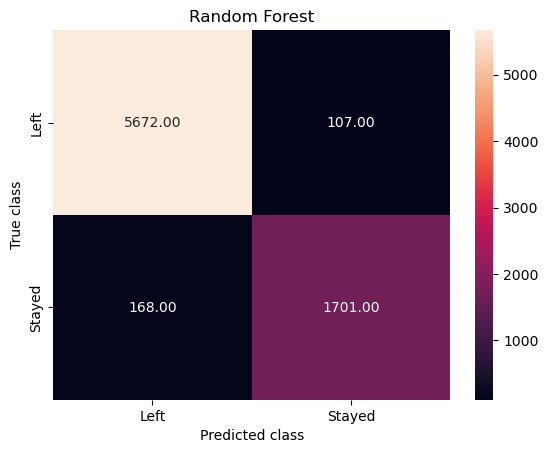

In [86]:
##Confusion matrix for random forest
y_pred = rf.predict(x_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_CM = metrics.confusion_matrix(y_pred,y_test)
sns.heatmap(forest_CM,annot = True, fmt = '.2f',xticklabels = ['Left','Stayed'], yticklabels = ['Left','Stayed'])
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

In [ ]:
##Accuracy is 96%, i.e model is 96% accurate.

In [47]:
##Classification report for Logistic Regression
print(classification_report(y_test, logreg.predict(x_test)))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      5840
           1       0.51      0.26      0.34      1808

    accuracy                           0.77      7648
   macro avg       0.66      0.59      0.60      7648
weighted avg       0.73      0.77      0.74      7648



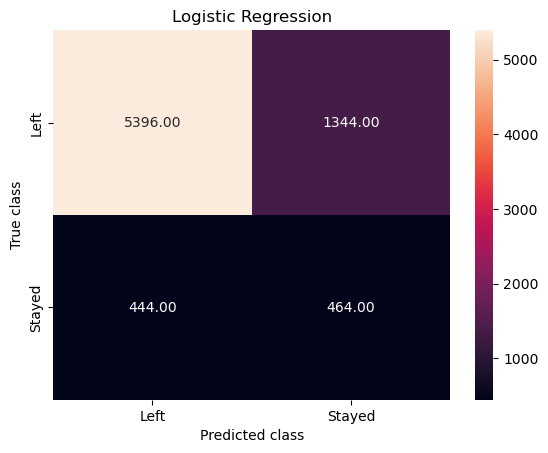

In [88]:
#Confusion matrix for Logistic Regression
logreg_y_pred = logreg.predict(x_test)
logreg_CM = metrics.confusion_matrix(logreg_y_pred,y_test)
sns.heatmap(logreg_CM,annot = True, fmt = '.2f',xticklabels = ['Left','Stayed'], yticklabels = ['Left','Stayed'])
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')

In [ ]:
##Accuracy is 76%, i.e model is 76% accurate.

In [89]:
##Classification report for SVM
print(classification_report(y_test, svc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      5840
           1       0.75      0.82      0.78      1808

    accuracy                           0.89      7648
   macro avg       0.84      0.87      0.85      7648
weighted avg       0.90      0.89      0.89      7648



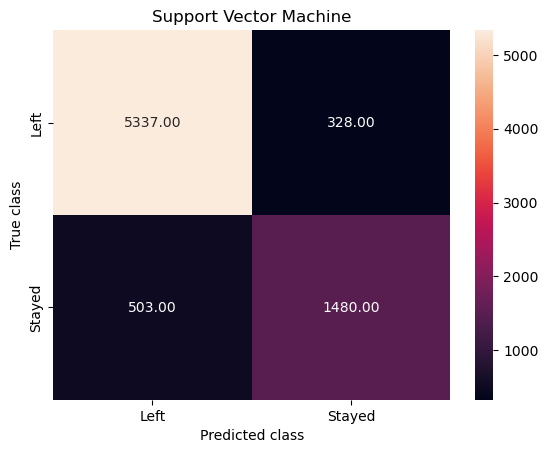

In [90]:
#Confusion matrix for SVM
svc_y_pred = svc.predict(x_test)
svc_CM = metrics.confusion_matrix(svc_y_pred,y_test)
sns.heatmap(svc_CM,annot = True, fmt = '.2f',xticklabels = ['Left','Stayed'], yticklabels = ['Left','Stayed'])
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.savefig('support_vector_machine')

In [ ]:
##Accuracy is 89%, i.e model is 89% accurate.

In [91]:
##Classification report for XGBoost
print(classification_report(y_test, xgb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      5840
           1       0.91      0.93      0.92      1808

    accuracy                           0.96      7648
   macro avg       0.95      0.95      0.95      7648
weighted avg       0.96      0.96      0.96      7648



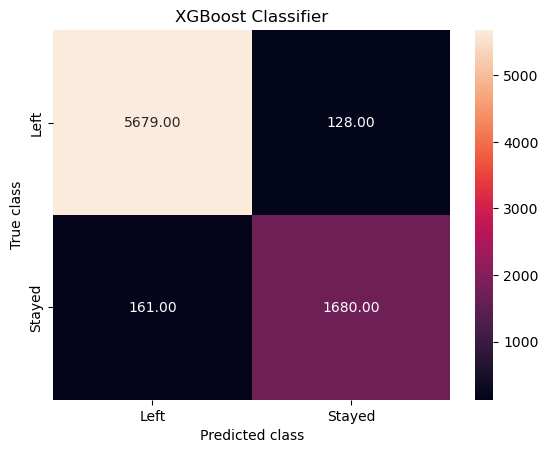

In [92]:
#Confusion matrix for XGBoost Classifier
xgb_y_pred = xgb.predict(x_test)
xgb_CM = metrics.confusion_matrix(xgb_y_pred,y_test)
sns.heatmap(xgb_CM,annot = True, fmt = '.2f',xticklabels = ['Left','Stayed'], yticklabels = ['Left','Stayed'])
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('XGBoost Classifier')
plt.savefig('xgboost_classifier')

In [ ]:
##Accuracy is 96%, i.e model is 96% accurate.

### Variable Importance for Random Forest Classifier

In [ ]:
##Note: After training a random forest it is natural to ask which variables have the most predictive power. Why? 
##Because such variable with high importance are drivers of outcome and 
## their value have a significant impact on the outcome values.

In [48]:
feature_labels = np.array(['satisfaction_level', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'department_RandD', 'department_hr', 'department_management', 'salary_high',  'salary_low',  'salary_medium'])

importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()

for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

department_management-0.33%
department_hr-0.37%
department_RandD-0.41%
salary_medium-0.46%
promotion_last_5years-0.47%
salary_high-0.73%
salary_low-1.08%
Work_accident-2.17%
time_spend_company-32.95%
satisfaction_level-61.03%


In [ ]:
##Satisfaction level is 61.03%, which shows it's a major reason why employees resign.

## Variable Importance for XGBoost Classifier

In [49]:
feature_labels = np.array(['satisfaction_level', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'department_RandD', 'department_hr', 'department_management', 'salary_high',  'salary_low',  'salary_medium'])

importance = xgb.feature_importances_
feature_indexes_by_importance = importance.argsort()

for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

department_management-1.65%
department_RandD-2.19%
salary_medium-2.21%
department_hr-2.38%
salary_low-4.09%
promotion_last_5years-5.95%
Work_accident-6.85%
salary_high-7.48%
satisfaction_level-27.84%
time_spend_company-39.36%


In [ ]:
## The top 6 of both variable reports have 5 viariable importance features in common.

## Hyperparameter Tuning

In [ ]:
## Hyperparameter is a parameter whose value is used to control the machine learning process.

In [59]:
from sklearn.model_selection import RandomizedSearchCV

In [60]:
## Randomized Search CV
n_estimators = [int(x) for x in np.linspace(100, 1200, num = 12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num = 6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [61]:
## We will create a dictionary out of it and use the previous parameters defined above to fit into our Randomized Search CV.
random_grid = {'n_estimators' : n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [62]:
rf = RandomForestClassifier()

In [63]:
random_search = RandomizedSearchCV(rf, param_distributions = random_grid, scoring = 'accuracy', n_iter = 10, cv = 5, verbose = 2, random_state = 42, n_jobs = 1)

In [64]:
rf.fit(x,y)

RandomForestClassifier()

In [124]:
rf.best_score_

AttributeError: 'RandomForestClassifier' object has no attribute 'best_score_'